In [24]:
import src.acquire
import src.prepare
import src.explore
import src.model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Addidtional Reporting Outside of Model

In [31]:
# get full dataset within the date range May - June 2017
Df = src.acquire.get_zillow_data(cached=False)

In [32]:
Df.shape

(21927, 62)

In [4]:
# drop columns not related to tax calculation or location
taxdf = Df[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
            'taxamount', 'transactiondate', 'latitude', 'longitude', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc',
                      'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip']]


In [5]:
taxdf.isnull().sum()

structuretaxvaluedollarcnt       36
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         1
transactiondate                   0
latitude                          0
longitude                         0
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc             7791
regionidcity                    397
regionidcounty                    0
regionidneighborhood          13127
regionidzip                      14
dtype: int64

In [6]:
# drop 'structuretaxvaluedollarcnt', 'propertyzoningdesc', 'regionidcity','regionidneighborhood'  = too many nulls
# drop 'landtaxvaluedollarcnt': 'taxvaluedollarcnt' should be the total tax which is what we want
# drop single record that is missing taxamount, one out of +20,000 should not impact overall calculations
# drop 14 records that are missing regionidzip, 14 out of +20,000 should not impact overall calculations
taxdf = taxdf.drop(columns=['regionidneighborhood', 'structuretaxvaluedollarcnt', 'propertyzoningdesc', 'regionidcity', 'landtaxvaluedollarcnt'])
taxdf = taxdf.dropna(axis=0)
taxdf.head()

,taxvaluedollarcnt,assessmentyear,taxamount,transactiondate,latitude,longitude,propertycountylandusecode,propertylandusetypeid,regionidcounty,regionidzip
0,43439.0,2016.0,756.94,2017-06-08,33981374.0,-118317057.0,0300,247.0,3101.0,96028.0
1,136104.0,2016.0,2319.90,2017-06-23,34686163.0,-118113100.0,0101,261.0,3101.0,97318.0
2,35606.0,2016.0,543.69,2017-06-30,33999877.0,-118291863.0,0100,261.0,3101.0,96018.0
3,880456.0,2016.0,9819.72,2017-06-01,33694636.0,-117912245.0,1,261.0,1286.0,96958.0
4,614000.0,2016.0,7673.19,2017-06-01,33985377.0,-118361620.0,0100,261.0,3101.0,96037.0


In [7]:
taxdf.isnull().sum()

taxvaluedollarcnt            0
assessmentyear               0
taxamount                    0
transactiondate              0
latitude                     0
longitude                    0
propertycountylandusecode    0
propertylandusetypeid        0
regionidcounty               0
regionidzip                  0
dtype: int64

In [8]:
taxdf['tax_rate'] = taxdf.taxamount/taxdf.taxvaluedollarcnt
taxdf.head()

,taxvaluedollarcnt,assessmentyear,taxamount,transactiondate,latitude,longitude,propertycountylandusecode,propertylandusetypeid,regionidcounty,regionidzip,tax_rate
0,43439.0,2016.0,756.94,2017-06-08,33981374.0,-118317057.0,0300,247.0,3101.0,96028.0,0.017425
1,136104.0,2016.0,2319.90,2017-06-23,34686163.0,-118113100.0,0101,261.0,3101.0,97318.0,0.017045
2,35606.0,2016.0,543.69,2017-06-30,33999877.0,-118291863.0,0100,261.0,3101.0,96018.0,0.015270
3,880456.0,2016.0,9819.72,2017-06-01,33694636.0,-117912245.0,1,261.0,1286.0,96958.0,0.011153
4,614000.0,2016.0,7673.19,2017-06-01,33985377.0,-118361620.0,0100,261.0,3101.0,96037.0,0.012497


In [9]:
taxdf.tax_rate.describe()
# note the max is way out of range, drop?

count    21912.000000
mean         0.013210
std          0.005961
min          0.000141
25%          0.011629
50%          0.012265
75%          0.013460
max          0.452884
Name: tax_rate, dtype: float64

In [10]:
taxdf.tax_rate.median()

0.012264588060319308

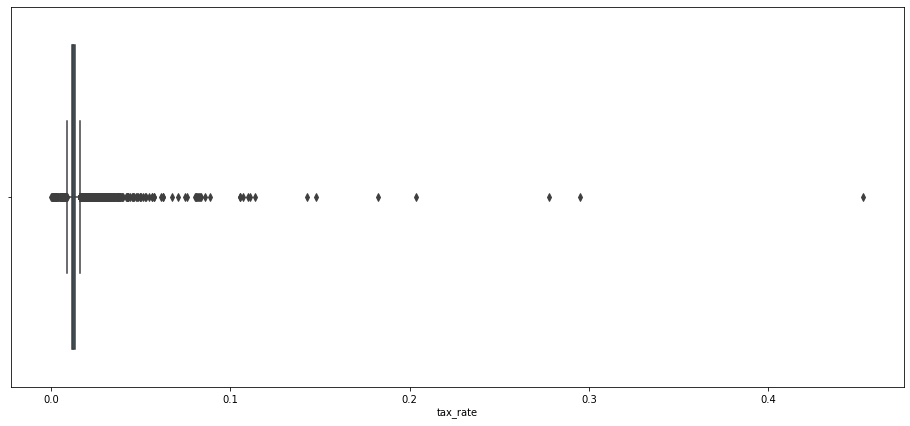

In [11]:
plt.figure(figsize=(16, 7))
sns.boxplot(taxdf.tax_rate)

In [12]:
outliers = taxdf[taxdf.tax_rate > .1]
outliers
# note from this article that in some parts of US the effective tax rate for 2019 was as high as 6%
# https://www.attomdata.com/news/market-trends/figuresfriday/top-10-u-s-counties-with-the-greatest-effective-tax-rates/

,taxvaluedollarcnt,assessmentyear,taxamount,transactiondate,latitude,longitude,propertycountylandusecode,propertylandusetypeid,regionidcounty,regionidzip,tax_rate
1600,49899.0,2016.0,5678.07,2017-05-05,33811377.0,-118272761.0,0100,261.0,3101.0,96229.0,0.113791
1628,59629.0,2016.0,17582.50,2017-05-05,34245666.0,-119050381.0,1110,261.0,2061.0,97089.0,0.294865
5099,47163.0,2016.0,13096.41,2017-05-16,34266959.0,-118402910.0,0100,261.0,3101.0,96361.0,0.277684
5969,31014.0,2016.0,3441.28,2017-05-18,34070122.0,-118246703.0,0100,261.0,3101.0,95993.0,0.110959
8109,132742.0,2016.0,24234.62,2017-05-25,34139456.0,-117844154.0,0101,261.0,3101.0,96486.0,0.182569
8407,113857.0,2016.0,11977.62,2017-05-25,34163975.0,-118033070.0,0100,261.0,3101.0,96267.0,0.105199
8521,41366.0,2016.0,5912.74,2017-05-25,34030279.0,-118336150.0,0200,246.0,3101.0,95997.0,0.142937
8849,555319.0,2016.0,58634.77,2017-05-26,34112576.0,-118393719.0,0101,261.0,3101.0,96086.0,0.105588
11562,56697.0,2016.0,11541.02,2017-06-02,34067924.0,-117959671.0,0100,261.0,3101.0,96523.0,0.203556
12430,54836.0,2016.0,8117.87,2017-06-06,33891709.0,-118331863.0,0100,261.0,3101.0,96106.0,0.148039


In [27]:
# drop these specific outliers because the variance caused skews the data too far and 13 observations is small amount
# also domain research indicate that as of 2019 6.6% is highest tax rate in any US county
# working on the assumption that if State is requested info 
test = taxdf.drop(labels=[1600, 1628, 5099, 5969, 8109, 8407, 8521, 8849, 11562, 12430, 14313, 20313, 21502], axis=0)

In [30]:
out_test = test[test.tax_rate > .1]
out_test

,taxvaluedollarcnt,assessmentyear,taxamount,transactiondate,latitude,longitude,propertycountylandusecode,propertylandusetypeid,regionidcounty,regionidzip,tax_rate


In [17]:
taxdf.groupby('regionidcounty')[['tax_rate']].min()

,tax_rate
regionidcounty,
1286.0,0.000141
2061.0,0.000677
3101.0,0.001071


In [18]:
taxdf.groupby('regionidcounty')[['tax_rate']].max()

,tax_rate
regionidcounty,
1286.0,0.107350
2061.0,0.294865
3101.0,0.452884


In [16]:
taxdf.regionidcounty.value_counts()

3101.0    14191
1286.0     5908
2061.0     1813
Name: regionidcounty, dtype: int64

In [ ]:
path='zillow_df.csv'

Df, X_train_explore, \
    X_train_scaled, y_train, \
    X_validate_scaled, y_validate, \
    X_test_scaled, y_test = src.prepare.wrangle_zillow(path)

X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

In [ ]:
X_train_scaled.head()

In [ ]:
X_train_explore.info()

In [ ]:
X_train_explore.head()

## Notes

1. I already uploaded my env.py file so need need to upload yours.  We only need one to access the data.


2. I already uploaded a .gitignore so also no worries there


3. Data is ready to go, i want to engeneer a feature that combines bed and bath, but get a weird error when I try.    we can trouble shoot after mvp, but code can be found in .prepare file


4. We have 3 categorical variables  and 14 numeric
   - "regionidzip"
   - "propertylandusetypeid"
   - 'yearbuilt'
   

5. id.1 and Unmaed:0 showd up we also need to delete them

***

## What Data do we need in our initial SQL querry?


What is a single unit property?

By James Chen Updated Sep 11, 2020 What Is a Housing Unit?

The term housing unit refers to a single unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence such as a house, apartment, mobile home, or may also be a single unit in a group of rooms. Essentially, a housing unit is deemed to be a separate living quarter where the occupants live and eat separately from other residents of the structure or building. They also have direct access from the building's exterior or through a common hallway.

    https://www.investopedia.com/terms/h/housingunits.asp

Properties in the Database: Based on the above definition some categories do not fit brief

Propertylandusetypeid | propertylandusedesc

  No        31           Commercial/Office/Residential Mixed Used  (not a residence)
  No        46           Multi-Story Store                         (not a residence)
  No        47           Store/Office (Mixed Use)                  (not a residence)
            246          Duplex (2 Units, Any Combination)
            247          Triplex (3 Units, Any Combination)
            248          Quadruplex (4 Units, Any Combination)
            260          Residential General
            261          Single Family Residential
            262          Rural Residence
            263          Mobile Home
            264          Townhouse
            265          Cluster Home
            266          Condominium
  No        267          Cooperative                               (become shareholder not owner)
            268          Row House
            269          Planned Unit Development
  No        270          Residential Common Area                   (propterty feature)
  No        271          Timeshare                                 (become shareholder not owner)
            273          Bungalow
            274          Zero Lot Line
            275          Manufactured, Modular, Prefabricated Homes
            276          Patio Home
            279          Inferred Single Family Residential
  No        290          Vacant Land - General                     (not a residence)
  No        291          Residential Vacant Land                   (not a residence)



## Feature Selection (my thoughts and why)



What Data do we need in our inital df? (20,931 Housing Units)

    parcelid 20931 non-null int64 Listing Number - Drop for Explore
    
    
    id 20931 non-null int64 Listing ID - Drop for Explore
    
    
    airconditioningtypeid 6779 non-null float64 Too Many null-values - Drop for Explore
    
    
    architecturalstyletypeid 52 non-null float64 Too Many null-values - Drop for Explore
    
    
    basementsqft 16 non-null float64 16 non-values - Drop for Explore
    
    
    bathroomcnt 20931 non-null float64 Use
    
    
    bedroomcnt 20931 non-null float64 Use - Combine bath/bed (feature engeneering)
    
    
    buildingclasstypeid 0 non-null object All Values Null - Drop for Explore
    
    
    buildingqualitytypeid 13257 non-null float64 Too Many null-values - Drop for Explore
    
    
    calculatedbathnbr 20771 non-null float64 Repeat of barthromcnt - Drop for Explore
    
    
    decktypeid 174 non-null float64 Too Many null-values - Drop for Explore
    
    
    finishedfloor1squarefeet 1738 non-null float64 Repeat Column - Drop for Explore
    
    
    calculatedfinishedsquarefeet 20868 non-null float64 Use - Drop null
    
    
    finishedsquarefeet12 20024 non-null float64 Repeat Column - Drop for Explore
    
    
    finishedsquarefeet13 17 non-null float64 Repeat Column - Drop for Explore
    
    
    finishedsquarefeet15 736 non-null float64 Repeat Column - Drop for Explore
    
    
    finishedsquarefeet50 1738 non-null float64 Repeat Column - Drop for Explore
    
    
    finishedsquarefeet6 91 non-null float64 Repeat Column - Drop for Explore
    
    
    fips 20931 non-null float64 Repeat Column - Drop for Explore
    
    
    fireplacecnt 2422 non-null float64 Use - change null to 0
    
    
    fullbathcnt 20771 non-null float64 Repeat of bathroom - Drop for Explore
    
    
    garagecarcnt 7075 non-null float64 Use - Rename as garage, change null to 0
    
    
    garagetotalsqft 7075 non-null float64 - garagesqft verifys that they exist
    
    
    hashottuborspa 461 non-null float64 Use - change null to 0, for no ht or spa
    
    
    heatingorsystemtypeid 13285 non-null float64 Too Many null-values - Drop for Explore
    
    
    latitude 20931 non-null float64 Repeat Column - Drop for Explore
    
    
    longitude 20931 non-null float64 Repeat Column - Drop for Explore
    
    
    lotsizesquarefeet 18742 non-null float64 Too Large for Modeling, Scaling?
    
    
    poolcnt 4496 non-null float64 Use - change null to 0, for no pool
    
    
    poolsizesum 251 non-null float64 Repeat Column - Drop for Explore
    
    
    pooltypeid10 121 non-null float64 Repeat Column - Drop for Explore
    
    
    pooltypeid2 340 non-null float64 Repeat Column - Drop for Explore
    
    
    pooltypeid7 4154 non-null float64 Repeat Column - Drop for Explore
    
    
    propertycountylandusecode 20931 non-null object Repeat Column - Drop for Explore
    
    
    propertylandusetypeid 20931 non-null float64 Use - Categories
    
    
    propertyzoningdesc 13437 non-null object Too Many null-values - Drop for Explore
    
    
    rawcensustractandblock 20931 non-null float64 **Repeat info(zip)
    
    
    regionidcity 20503 non-null float64 Repeat info(zip) - Drop for Explore
    
    
    regionidcounty 20931 non-null float64 Repeat info(zip) - Drop for Explore
    
    
    regionidneighborhood 8443 non-null float64 Too Many null-values - Drop for Explore
    
    
    regionidzip 20916 non-null float64 Use - latered to categorical
    
    
    roomcnt 20931 non-null float64 Use
    
    
    storytypeid 16 non-null float64 Too Many null-values - Drop for Explore
    
    
    threequarterbathnbr 2800 non-null float64 Repeat info(bathroom) - Drop for Explore
    
    
    typeconstructiontypeid 56 non-null float64 Too Many null-values - Drop for Explore
    
    
    unitcnt 13476 non-null float64 Repeat info() - Drop for Explore
    
    
    yardbuildingsqft17 701 non-null float64 Too Many null-values - Drop for Explore
    
    
    yardbuildingsqft26 25 non-null float64 Too Many null-values - Drop for Explore
    
    
    yearbuilt 20850 non-null float64 Use - Drop null values
    
    
    numberofstories 4917 non-null float64 Too Many null-values - Drop for Explore
    
    
    fireplaceflag 51 non-null float64 Repeat info(firepls) - Drop for Explore
    
    
    structuretaxvaluedollarcnt 20897 non-null float64 Correlates w/Target - Drop for Explore
    
    
    taxvaluedollarcnt 20930 non-null float64 Target Variable
    
    
    assessmentyear 20931 non-null float64 Filtered in SQL - Drop for Explore
    
    
    landtaxvaluedollarcnt 20930 non-null float64 Correlates w/Target - Drop for Explore
    
    
    taxamount 20931 non-null float64 Correlates w/Target - Drop for Explore
    
    
    taxdelinquencyflag 703 non-null object Correlates w/Target - Drop for Explore
    
    
    taxdelinquencyyear 703 non-null float64 Correlates w/Target - Drop for Explore
    
    
    censustractandblock 20852 non-null float64 Repeat Column - Drop for Explore
    
    
    id 20931 non-null int64 Repeat Column - Drop for Explore
    
    
    logerror 20931 non-null float64 Calculation - Drop for Explore
    
    
    transactiondate 20931 non-null object Filtered in SQL - Drop for Explore

***

## Final Feature Selection (Corey)

**12 Numeric Features**
- bathroomcnt                    
- bedroomcnt                     
- calculatedfinishedsquarefeet   
- fireplace                      
- garage                        
- hottub_spa                    
- lotsizesquarefeet              
- poolcnt                        
- roomcnt                        
- yearbuilt                      
- zip                           
- useid  
- **Hopefull 13th Combination of bed and bath**


**2 Categorical Features**
 - zip
 - useid

***

## SQL Querries

In [ ]:


# Code to acquire data
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279');
'''

# Returns 20,931 entries between May and June 2017
# Data represents single unit properties



In [ ]:


# Code to return number of houses per county

'''
select regionidcounty, count(*)
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
group by regionidcounty
order by regionidcounty;
'''

# Returns 3 counties (1286, 2061, 3101)



In [ ]:


# Code to return houses per county (Group by) for tax rate distribution
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
order by regionidcounty;
'''



In [ ]:
# Breaks down houses per county in to cities per county and zipcodes
'''
select regionidcity, regionidcounty, regionidzip
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
group by regionidcity, regionidcounty, regionidzip
order by regionidzip;
'''
# Returns a list of zip codes and city id numbers per county. Necessary to id **STATE**

In [ ]:


# All of the zipcodes and counts for that zipcode in for the dataset
'''
select count(*), regionidzip
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
group by regionidzip
order by regionidzip;
'''
# Returns 385 unique zip codes



In [ ]:


# All of the properties in county code 1286
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
and regionidcounty = 1286;
'''
# Returns 5640 values



In [ ]:


# All of the properties in county code 2061
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
and regionidcounty = 2061;
'''
# Returns 1799 values



In [ ]:


# All of the properties in county code 3101
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
and regionidcounty = 3101;
'''
# Returns 13492 values



In [ ]:


# All of the properties in county code Null
'''
select *
from properties_2017
join unique_properties using (parcelid)
join predictions_2017 using (parcelid)
WHERE transactiondate between '2017-06-01' AND '2017-07-31'
AND propertylandusetypeid IN ('246','247','248','260','261','262','263','264','265','266','268','269','273','274','275','276','279') 
and regionidcounty is Null;
'''
# Returns 0 values

